In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [33]:
original_results = {0:69,1:0,2:0,3:0,4:0,5:95}

In [13]:
new_results_file = open("logs/loopy_2023_07_24_00_24_57.json", "r", encoding='utf-8')

In [14]:
new_results_json = json.load(new_results_file)

In [16]:
new_healing_results_file = open("logs/healing_loopy_2023_07_24_10_55_31.json", "r", encoding='utf-8')

In [17]:
new_healing_results_json = json.load(new_healing_results_file)

In [42]:
new_results = {0:0,1:0,2:0,3:0,4:0,5:0}
new_results[0] = len(new_results_json["stats"]["success"])

In [43]:
for i in new_healing_results_json["logs"]:
    if len(i["healing_conversations"]) < 5:
        new_results[len(i["healing_conversations"])] += 1
    elif i["healing_conversations"][-1]["checker_output"] or i["healing_conversations"][-1]["checker_output_after_prune"]:
        new_results[len(i["healing_conversations"])] += 1
    else:
        continue

In [44]:
new_results

{0: 67, 1: 7, 2: 9, 3: 4, 4: 1, 5: 3}

In [45]:
new_results_ = {x:sum([new_results[i] for i in range(0,x+1)]) for x in new_results.keys()}

In [46]:
new_results_

{0: 67, 1: 74, 2: 83, 3: 87, 4: 88, 5: 91}

In [29]:
new_new_results = {0:0,1:0,2:0,3:0,4:0,5:0}

In [25]:
new_new_results_file = open("logs/loopy_2023_07_25_21_53_29.json", "r", encoding='utf-8')

In [26]:
new_new_results_json = json.load(new_new_results_file)

In [30]:
new_new_results[0] = len(new_new_results_json["stats"]["success"])

In [31]:
new_new_results

{0: 72, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

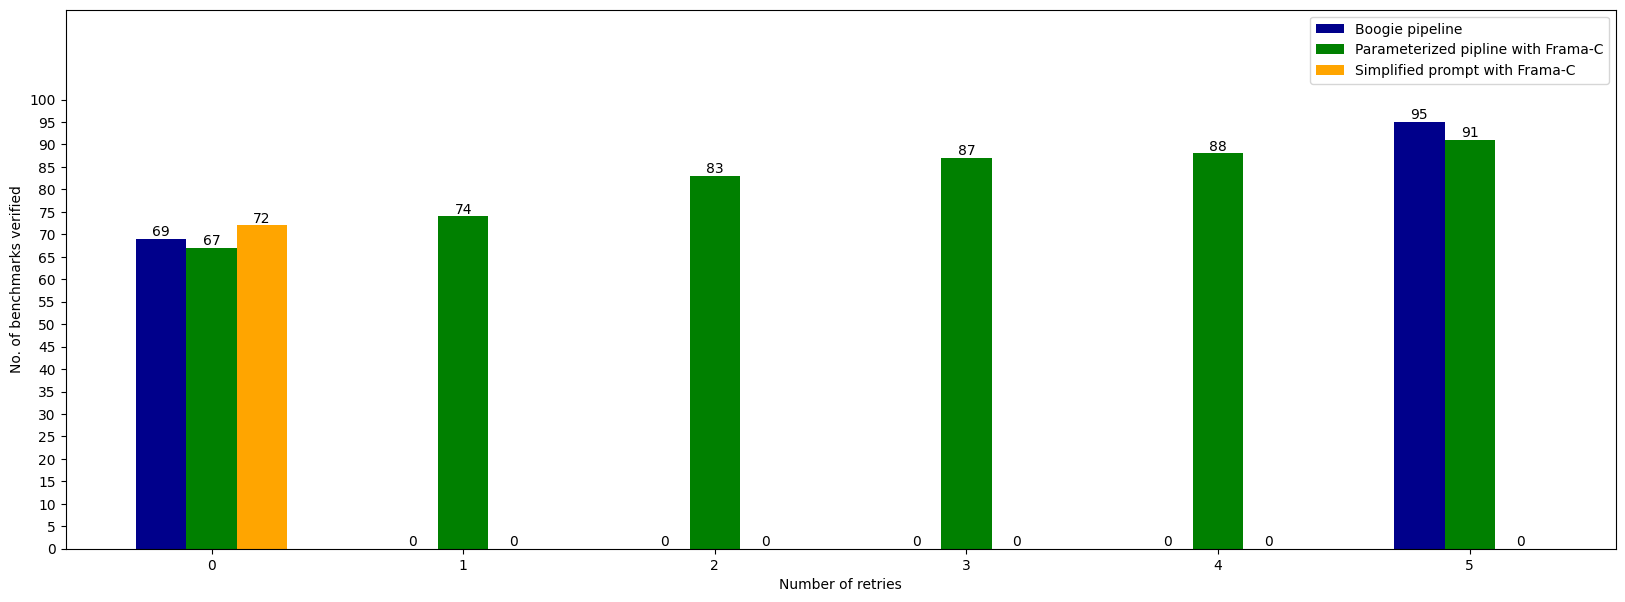

In [73]:
fig = plt.figure(figsize = (20, 7))
ax = plt.subplot(111)
x = np.arange(0, 6)
xaxis = original_results.keys()
yaxis = [original_results[i] if i in original_results.keys() else 0 for i in range(max(original_results.keys()) + 1)]
yaxis2 = [new_results_[i] if i in original_results.keys() else 0 for i in range(max(original_results.keys()) + 1)]
yaxis3 = [new_new_results[i] if i in original_results.keys() else 0 for i in range(max(original_results.keys()) + 1)]

ax.bar(x - 0.2, yaxis, color ='darkblue', width = 0.2, label='Boogie pipeline')
ax.bar(x, yaxis2, color ='green', width = 0.2, label='Parameterized pipline with Frama-C')
ax.bar(x + 0.2, yaxis3, color ='orange', width = 0.2, label='Simplified prompt with Frama-C')
ax.set_ylim([0, 120])
plt.xticks(range(0, 6))
plt.yticks(range(0, 101, 5))
plt.xlabel("Number of retries")
plt.ylabel("No. of benchmarks verified")
plt.legend(loc='upper right')
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("programs_verified.png")
plt.show()